# Introduction to the Machine Learning Lifecycle

This Jupyter notebook serves as a foundational template to familiarize oneself with all the essential stages in the machine learning lifecycle. 
From gaining a deep understanding of the dataset at hand to operationalizing the model, each stage plays a pivotal role in the development of a robust machine learning solution.
We will navigate through the following key stages:

0. Understand the Business: Grasping the broader business context where the machine learning model will be applied.
1. Define the Problem: Specifying what we are trying to solve with machine learning.
2. Prepare the Data: Processing and preparing the data for modeling.
3. Choose a Model: Selecting an appropriate algorithm or model that suits the problem.
4. Train the Model: Learning from the data by fitting the model to the training dataset.
5. Evaluate the Model: Assessing the model's performance using the test dataset or through cross-validation.
6. Parameter Tuning: Fine-tuning the model's hyperparameters to improve performance.
7. Make Prediction: Using the trained model to make predictions on new data.
8. ML Ops: Operationalizing the model in a production environment.

As we progress through each phase, we will delve into the specifics and the technicalities that are intrinsic to developing a successful machine learning model. The focus of this narrative is to provide a clear view of the typical workflow, the rationale behind each step, and to lay down a repeatable process that can be adapted to future projects.

## Libraries

In [2]:
# Data manipulation
# ==============================================================================

import pandas as pd
import numpy as np
import operator
from joblib import dump

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Modeling 
# ==============================================================================

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('once')

## Simulate a dataset

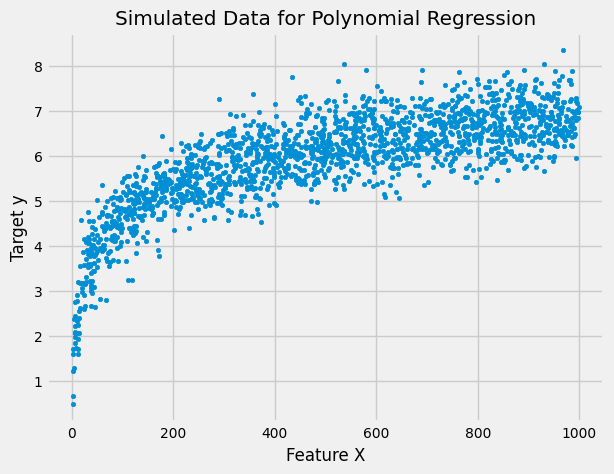

In [3]:
# Set a seed for reproducibility

np.random.seed(12345)

# Generate data
X = np.random.randint(1, 1000, size=1789)  # Number of employees
errors = np.random.normal(0, 0.5, size=1789)  # Random errors
Y = np.log(X) + errors  # Gross earnings with a logarithmic relationship plus some error

# Create a DataFrame
df = pd.DataFrame({'Number of Employees': X, 'Gross Earnings': Y})


# Visualize the data
plt.scatter(X, Y, s=10)
plt.title("Simulated Data for Polynomial Regression")
plt.xlabel("Feature X")
plt.ylabel("Target y")
plt.show()

## 0. Understand the business

In the context of a Public Policies center, understanding the business interests is vital for aligning machine learning solutions with policy objectives and societal needs. It involves recognizing the center's goals, such as improving public welfare, enhancing service delivery, or informing policy decisions, and tailoring ML projects to support these aims effectively. This deep understanding ensures that ML initiatives are not only technically sound but also relevant and impactful in addressing the unique challenges and opportunities within the public policy domain.

## 1. Define the problem

The task at hand is a **regression problem** where we aim to predict the gross earnings (`Y`) of a company based on the number of employees (`X`). The dataset is a simulated set of values representing the number of employees of different companies and their corresponding gross earnings. 

The relationship between the two variables is nonlinear, specifically a logarithmic relationship, which means that as the number of employees increases, the gross earnings increase at a diminishing rate. This kind of relationship is typical in scenarios where the marginal gain decreases as the size of the company grows.

### Data Description

The dataset has been generated with the following characteristics:
- `X`: The number of employees, ranging from 1 to 1000 across companies.
- `Y`: The gross earnings, which is a function of the number of employees. The relationship between the number of employees and gross earnings is modeled with a logarithmic function, `log(X)`, with added normally distributed random noise to simulate real-world data variance.

### Objective

The goal is to build a predictive model that accurately estimates the gross earnings of a company based on its number of employees. This model will be valuable for strategic planning, financial analysis, and economic forecasting.

### Modeling Approaches

Considering the nonlinear nature of the problem, the following modeling approaches are deemed suitable:

- Polynomial Regression: To capture the nonlinear relationship by fitting a polynomial curve to the data.
- Decision Trees and Ensemble Methods: To model the data without the need for explicit feature transformation.
- Regularization Techniques: To prevent overfitting when using models with high flexibility such as polynomial regression.
- Support Vector Regression: To apply kernel methods that can handle nonlinearity.
- Neural Networks: To use a data-driven approach for capturing the complex mappings between inputs and outputs.

The choice of the model will depend on the performance metrics such as R-squared, Mean Squared Error, and computational efficiency during the model selection process.

This just a way to present en ML cycle, so we'll stay simple and we don't dive en to many models.

## 2. Prepare the Data

Proper data preparation is a critical step in the machine learning workflow. It involves several sub-steps designed to convert raw data into a format that is suitable for building and training machine learning models. Here's how we've prepared our dataset:

### Cleaning the Data

Before we proceed, we ensure the dataset is free from anomalies and missing values that could skew our model's performance. This includes:

- Removing or imputing missing values.
- Identifying and handling outliers that are genuine errors.
- Ensuring that all data is correctly formatted and annotated.

For our simulated dataset, we skip this step as our data was generated to be clean and ready for use.

### Feature Selection

Feature selection involves choosing the relevant features that contribute most to the prediction variable or output in which we are interested:

- We have a single feature 'Number of Employees', which is our independent variable.
- Our target variable is 'Gross Earnings', which we aim to predict.

### Feature Engineering

Feature engineering is the process of using domain knowledge to create new features that help machine learning models to learn better or faster:

- Given the logarithmic relationship between 'Number of Employees' and 'Gross Earnings', one might consider engineering a feature that captures this nonlinearity, such as the log of 'Number of Employees'. However, in this case, we want to test if our model can infer this relationship.

### Data Splitting

To evaluate our model's performance objectively, we split the data into a training set and a testing set:

- The **training set** is used to train the model, where the model learns to predict outcomes.
- The **testing set** is used to assess the model's predictive performance on unseen data, which helps to evaluate how well the model generalizes.

Using `train_test_split` from `sklearn.model_selection`, we will partition the data into 75% for training and 25% for testing. This ratio is a common practice that balances the need for both training and validation:


**Python Code Description**

To split the data into training and testing sets, we'll use the train_test_split function from the sklearn.model_selection module. We'll allocate 75% of the data for training and 25% for testing. The train_test_split function shuffles the data before splitting (which is important for maintaining randomness), but since we're using a seeded random state (np.random.seed), our results will be reproducible.

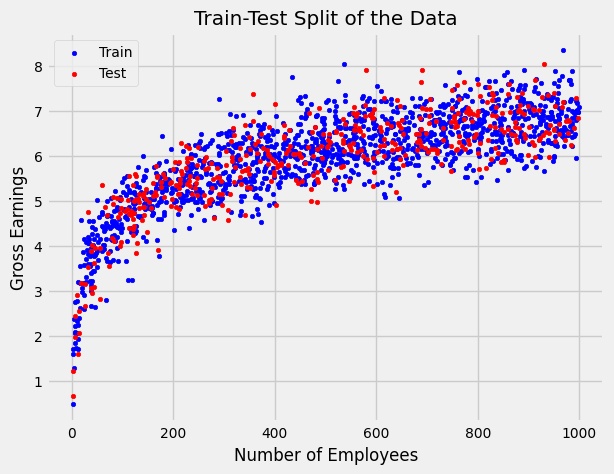

In [4]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df[['Number of Employees']], df['Gross Earnings'], test_size=0.25, random_state=12345)

# Visualize the split
plt.scatter(X_train, Y_train, color='blue', label='Train', s=10)
plt.scatter(X_test, Y_test, color='red', label='Test', s=10)
plt.legend()
plt.title("Train-Test Split of the Data")
plt.xlabel("Number of Employees")
plt.ylabel("Gross Earnings")
plt.show()


## 3. Choose a Model(s)

Based on the problem type and data characteristics, we select a ML model. For our regression problem, we'll start with a simple Linear Regression.

Given the problem statement and the simulated data, you're dealing with a regression task where you want to predict a continuous variable, which in this case is 'Gross Earnings' based on the number of employees. The relationship between the number of employees and gross earnings is nonlinear, as indicated by the use of the logarithm in your data generation process. Based on this, here are different modeling approaches you can consider:

**Linear Models**

Simple Linear Regression: It might not fit well since the relationship is nonlinear.
Multiple Linear Regression: If there were more features, this could be used with transformed features to capture nonlinearity.

**Polynomial and Nonlinear Models**

Polynomial Regression: As you've used, fits a polynomial curve to the data. The degree of the polynomial can be chosen based on model performance.
Generalized Additive Models (GAMs): Allows for flexible, nonlinear relationships between each feature and the target.

**Regularized Linear Models**

Ridge Regression: Useful if you're using polynomial features, as it can help to prevent overfitting by penalizing large weights.
Lasso Regression: Can also be used with polynomial features; has the advantage of feature selection by shrinking some coefficients to zero.
Elastic Net: Combines L1 and L2 regularization which can be beneficial with polynomial features.

**Tree-Based Models**

Decision Tree Regression: Can capture complex nonlinear relationships without needing feature transformation.
Random Forest Regression: An ensemble of decision trees that often performs better than a single decision tree.
Gradient Boosting Regression: Sequentially adds trees, each correcting the errors of the previous ones, often leading to strong performance.
XGBoost, LightGBM, and CatBoost: Optimized gradient boosting libraries that can handle large datasets and have high performance.

**Support Vector Machines**
Support Vector Regression (SVR): Can model nonlinear relationships using kernel trick.

**Neural Networks and Deep Learning Models**
Feedforward Neural Networks: With one or more hidden layers, can approximate any continuous function (Universal Approximation Theorem).
Convolutional Neural Networks (CNNs): Though primarily used for image data, can also be applied to sequence data.
Recurrent Neural Networks (RNNs): Good for sequence data, might be overkill for this problem.

**Other Models**
K-Nearest Neighbors (KNN): Can potentially be used for regression by averaging the target values of nearest neighbors.
Gaussian Processes: A probabilistic model that can fit very flexible shapes, but might not scale well with the number of samples.
Ensemble Methods
Stacking: Combines various models, using a meta-regressor to blend their predictions.
Bagging: Helps reduce variance and prevent overfitting.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

Each model has its strengths and weaknesses. Simple models like linear regression are easily interpretable but might not capture complex patterns. Nonlinear models like trees and neural networks can capture complex patterns but may require more data and are less interpretable.

Choosing the right model often depends on several factors, including the size and nature of the dataset, the computational resources available, the required interpretability of the model, and the balance between bias and variance that you want to achieve. It's common practice to try multiple models and use cross-validation to compare their performance before deciding on the best one.

With the chosen model, we proceed to train it using the training dataset. This involves fitting the model's parameters to our data.

Some examples of coding in ML regression models

In [5]:
# 1. Linear Regression

from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [6]:
# 2. Ridge Regression

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, Y_train)

Ridge()

In [7]:
# 3. Lasso Regression

from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # alpha is the regularization strength
lasso_model.fit(X_train, Y_train)

Lasso()

In [8]:
# 4. Elastic Net

from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # l1_ratio is the balance between L1 and L2 regularization
elasticnet_model.fit(X_train, Y_train)

ElasticNet()

In [9]:
# 5. Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())  # degree specifies the polynomial degree
polynomial_model.fit(X_train, Y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

## 4. Train the Model

The "Train the Model" stage is where the chosen machine learning model learns from the training data. During training, the model adjusts its parameters (weights and biases in the case of linear models) to minimize the difference between its predictions and the actual target values in the training set. This process is guided by a loss function, which quantifies the discrepancy between predicted and true values. The goal is to find the set of parameters that minimizes this loss function.

Training is a crucial step because a well-trained model can accurately capture the underlying patterns in the training data, enabling it to make reliable predictions on new, unseen data.

In this stage, rather than committing to a single model upfront, we advocate for training a variety of models. This multipronged approach allows us to understand how different algorithms perform and interact with our specific dataset. Key reasons for training several models include:

- **Establishing Baselines**: Simple models like linear regression or decision trees can provide quick insights and set a performance benchmark.
- **Leveraging Strengths**: Different models can capture different patterns in the data, and some may be more suited to certain types of relationships or distributions.
- **Complexity Exploration**: We can experiment with models of varying complexity to find the best trade-off between bias and variance.
- **Overfitting Mitigation**: Training multiple models helps in identifying potential overfitting, where a model performs well on training data but poorly on unseen data.
- **Feature Relevance**: Different models may highlight different features as important, offering deeper insights into the data.
- **Ensemble Learning**: We can potentially combine models to improve predictions and achieve better performance than any single model could.

As such, we will systematically work through a range of models, evaluate their performance, and select the best candidates for further tuning and validation.

As the aim of this document is to understand the stages of a machine learning analysis, we will not perform the estimation of several models. However, we will still explain the best practices in these types of processes.

In [10]:
# For the application part, let's use a simple LinearRegression model as an example for training. We'll follow these steps:
# 1. Initialize the model.
# 2. Train (fit) the model on the training data.

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, Y_train)

# The model is now trained and its parameters have been adjusted based on the training data


LinearRegression()

In this code snippet:

- LinearRegression() creates an instance of the Linear Regression model.
- fit(X_train, Y_train) trains the model using the training data. X_train contains the features from the training dataset, and Y_train contains the corresponding target values. During this step, the model adjusts its parameters to minimize the loss function, effectively learning from the training data.

After training, the model is ready to make predictions on new data using the predict method, evaluate its performance, and, if necessary, undergo further tuning or validation steps.

During the training stage of a regression model like Linear Regression, it's common to visualize the fit of the model to the training data. This can be done by plotting the training data points and overlaying the regression line or curve that the model has learned. This visualization helps in understanding how well the model has captured the underlying trend of the data.

Here's how you can create such a plot after training a Linear Regression model:

Train the Linear Regression model on your training data.
Plot the training data points.
Use the trained model to predict the outputs for the training inputs.
Plot the regression line by overlaying the predicted outputs on the same graph.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


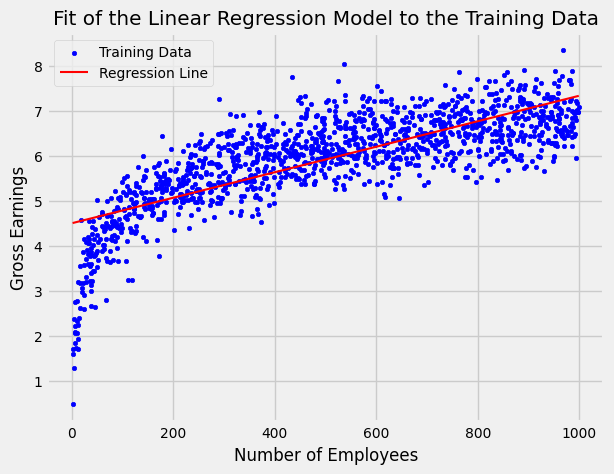

In [11]:
# 2. Plot the training data points
plt.scatter(X_train, Y_train, color='blue', label='Training Data', s=10)

# 3. Create a range of values for X to plot the regression line over the full extent
X_plot = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
Y_plot = linear_model.predict(X_plot)

# 4. Plot the regression line
plt.plot(X_plot, Y_plot, color='red', label='Regression Line')

# Correct the x-axis label
plt.xlabel('Number of Employees')
plt.ylabel('Gross Earnings')
plt.title('Fit of the Linear Regression Model to the Training Data')
plt.legend()
plt.show()

This visualization is a valuable tool to assess the initial performance of the model. It appears that the relationship between the Number of Employees and Gross Earnings might not be strictly linear, as the data points exhibit a curve-like distribution. This suggests that a linear model may not capture all the nuances of the dataset, and considering a polynomial regression or another model that can handle non-linearity might improve the fit.

## 5. Evaluate the Model

Model evaluation is a critical step in the machine learning workflow. It helps determine how well the model performs and how likely it is to make accurate predictions on new, unseen data. During this stage, you apply several metrics (also known as goodness-of-fit measures) to assess the model's predictions against the actual target values in the testing set. This evaluation can guide the selection of the best model and inform any adjustments or tuning that might be necessary.

Evaluation metrics vary depending on the type of problem. For regression, common metrics include:

R-squared (Coefficient of Determination)
Mean Squared Error (MSE)
Mean Absolute Error (MAE)
Root Mean Squared Error (RMSE)
Mean Absolute Percentage Error (MAPE)

In [12]:
# Evaluation metrics

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict on the test data
Y_test_pred = linear_model.predict(X_test)

# Calculate R-squared
r2 = r2_score(Y_test, Y_test_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_test_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, Y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((Y_test - Y_test_pred) / Y_test)) * 100

# Print out the metrics
print(f'R-squared: {r2:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'Mean Absolute Percentage Error: {mape:.2f}%')



R-squared: 0.59
Mean Squared Error: 0.46
Mean Absolute Error: 0.50
Root Mean Squared Error: 0.68
Mean Absolute Percentage Error: 11.44%


### Learning curves

Learning curves are a graphical representation of how the model's performance improves with experience (i.e., with more training data). They are useful for diagnosing bias and variance problems (underfitting and overfitting).

Here's how to plot learning curves:

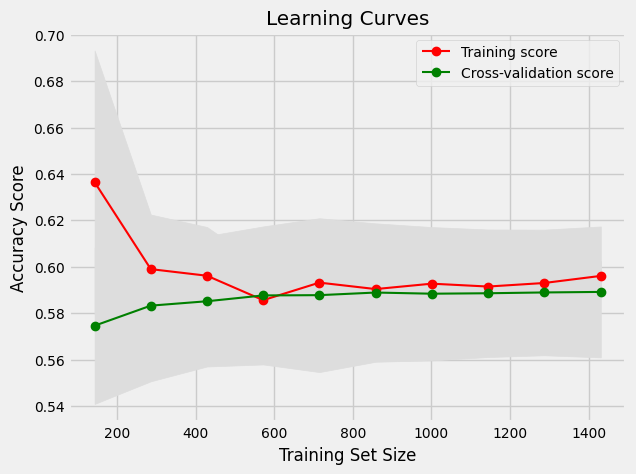

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(linear_model, df[['Number of Employees']], df['Gross Earnings'], train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend(loc="best")
plt.show()


The learning curve shows the training and cross-validation scores as functions of the training set size. Here's what you can infer from the plot:

Convergence of Training and Cross-validation Scores: The fact that both scores converge to a similar value indicates that adding more data is unlikely to improve the model's performance significantly. This suggests that the model has reached its performance capacity with the given features.

Gap Between the Curves: The relatively small gap between the training and cross-validation scores suggests that the model is not suffering from high variance, which is a typical sign of overfitting. If the model were overfitting, you would expect to see a much larger gap because the model would perform well on the training data but poorly on the cross-validation data.

Score Plateau: Both curves plateau after a certain point, which indicates that the model's performance has stabilized and additional training data does not lead to better predictions. This plateau suggests that the model might benefit from additional features or model complexity to capture more variance in the data.

Absolute Score Values: The accuracy scores seem to hover around 0.58 to 0.62. If this were a classification problem, such scores might indicate mediocre performance. However, in a regression context, these values do not correspond to accuracy in the typical sense. We would need to look at specific regression metrics (like R-squared, RMSE, etc.) to properly evaluate the model's performance. The y-axis label should be updated to reflect a regression metric rather than accuracy.

Potential for Improvement: Since the model is neither overfitting nor underfitting significantly, you might explore more complex models or feature engineering to improve performance. It's also important to ensure that the evaluation metric aligns with the business objective. For example, if predicting earnings within a certain range is more important than minimizing error on large earnings, then a different metric might be more appropriate.

In summary, the learning curve indicates that the model is generalizing relatively well, but its predictive power is limited by the features or the model's simplicity. To further improve the model, consider experimenting with more complex models, feature engineering, or tuning hyperparameters.

## 6. Parameter Tuning

Parameter tuning, also known as hyperparameter optimization, is the process of finding the best set of hyperparameters for a machine learning model. Hyperparameters are the configuration settings used to structure the learning algorithm; they are not learned from the data, but rather set prior to the training process and remain constant during training.

The goal of parameter tuning is to improve the performance of the model by optimizing its hyperparameters, which can significantly affect the outcome of the learning process. Effective hyperparameter tuning can lead to a more accurate and generalizable model.

There are several approaches to hyperparameter tuning, including grid search, random search, and Bayesian optimization. Grid search is a straightforward approach that involves exhaustively searching over a specified parameter grid.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Set up the pipeline steps for polynomial feature generation followed by linear regression
steps = [
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Define the parameter grid to search over
# We'll vary the degree of the polynomial
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Polynomial degrees to try
}

# Set up GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Get the best combination of parameters
best_parameters = grid_search.best_params_
best_score = -grid_search.best_score_  # Negate to get positive MSE

# Print the best parameters and the corresponding score
print(f"Best Polynomial Degree: {best_parameters['poly__degree']}")
print(f"Best Mean Squared Error: {best_score}")



Best Polynomial Degree: 5
Best Mean Squared Error: 0.269340337518814


### Validation curve

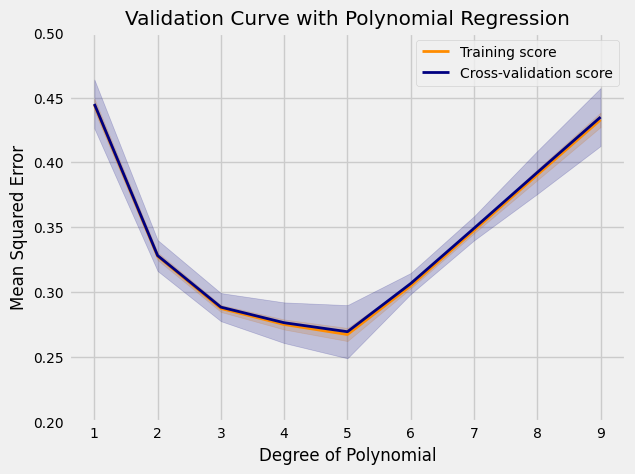

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Define a range of polynomial degrees to evaluate
degrees = np.arange(1, 10)

# Create a pipeline that includes polynomial feature generation and linear regression
model = make_pipeline(PolynomialFeatures(), LinearRegression())

# Calculate the training and test scores for the various polynomial degrees
train_scores, valid_scores = validation_curve(
    model, X_train, Y_train, 
    param_name='polynomialfeatures__degree', param_range=degrees,
    cv=5, scoring='neg_mean_squared_error'
)

# Calculate the mean and standard deviation for the training scores
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for the validation scores
valid_scores_mean = -np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve with Polynomial Regression")
plt.xlabel("Degree of Polynomial")
plt.ylabel("Mean Squared Error")
plt.ylim(0.2, 0.5)  # Adjust based on your specific dataset and MSE values

# Plot the mean score lines
plt.plot(degrees, train_scores_mean, label="Training score", color="darkorange", lw=2)
plt.plot(degrees, valid_scores_mean, label="Cross-validation score", color="navy", lw=2)

# Draw bands for the standard deviation of the scores
plt.fill_between(degrees, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="darkorange", alpha=0.2)
plt.fill_between(degrees, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, color="navy", alpha=0.2)

plt.legend(loc="best")
plt.show()


The validation curve shows how the mean squared error (MSE) changes with different degrees of the polynomial in polynomial regression. Here are the key takeaways from this curve:

Low Bias and Low Variance: The training score and the cross-validation score are quite close to each other for all degrees, suggesting that the model has low bias and low variance.

Optimal Model Complexity: There is no clear indication of overfitting or underfitting since the two lines are close and relatively flat. This implies that increasing the polynomial degree does not lead to a significant increase in model complexity, or that the additional complexity does not capture any additional patterns in the data.

Stable Error Rates: The MSE is stable across the degrees, indicating that the choice of polynomial degree in this range does not impact the model's performance much. This could suggest that the underlying relationship between the variables is not polynomial in nature or that the polynomial terms up to degree 9 do not significantly contribute to capturing the variance in the data.

Model Selection: Since the MSE is stable and low across the degrees tested, you could select a model with a lower degree to prioritize simplicity. A simpler model is usually preferable when performance is similar, as it's easier to interpret and less prone to overfitting when new data is introduced.

Further Exploration: Given the results, it might be worth exploring other types of models or feature engineering to see if there are other transformations or interactions between features that can better capture the variance in the data.

It's also important to note that while the MSE does not vary much, it's relatively high compared to the range of target variable values. This might indicate that there is still room for improvement, either through further feature engineering, data cleaning, or trying out different types of regression models.

#### Retrain and Save the Model



In [16]:
# Retrain the model with degree 5 on the entire training dataset
chosen_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
chosen_model.fit(X_train, Y_train)

#  the model can be save into the disk, or cloud
# dump(chosen_model, '/mnt/data/chosen_model.joblib')

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

## 7. Make Prediction

Once a model is selected and trained, the next step is to use it to make predictions on new data. This is the ultimate test of the model's ability to generalize from the training data to unseen situations. In a business context, this could mean predicting future outcomes based on historical data.

Making predictions involves feeding new input data (features) into the model and obtaining the predicted output (target). This step is crucial for deploying the model in a production environment where it can provide actionable insights or decisions.

#### Python Aplication

For the application, let's simulate new data representing the number of employees for 50 new companies and use the best model from the parameter tuning stage to predict their Gross Earnings. Then, we'll create a graph to visualize these predictions.

First, we'll generate the new data, then make predictions and finally plot the results:

Generate a New Dataset and Predict Values

In [17]:
# Generate new data for 50 new companies
np.random.seed(123)  # For reproducibility
new_companies = np.random.randint(1, 1000, size=50).reshape(-1, 1)


In [18]:
# Predict the Gross Earnings for the new dataset using the saved model
predictions = chosen_model.predict(new_companies)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [19]:
# Create a DataFrame for the new dataset with predictions
new_data_predictions = pd.DataFrame({
    'Number of Employees': new_companies.flatten(),
    'Predicted Gross Earnings': predictions
})

# Display the new dataset with predictions
print(new_data_predictions)

    Number of Employees  Predicted Gross Earnings
0                   511                  6.194450
1                   366                  5.878745
2                   383                  5.913015
3                   323                  5.790974
4                   989                  6.999541
5                    99                  4.560887
6                   743                  6.603035
7                    18                  3.035367
8                   596                  6.386907
9                   107                  4.661103
10                  124                  4.851045
11                  570                  6.330478
12                  215                  5.477166
13                  738                  6.599134
14                   97                  4.534672
15                  114                  4.742958
16                  639                  6.470784
17                   48                  3.724255
18                   74                  4.196944


### Visualize the Predictions

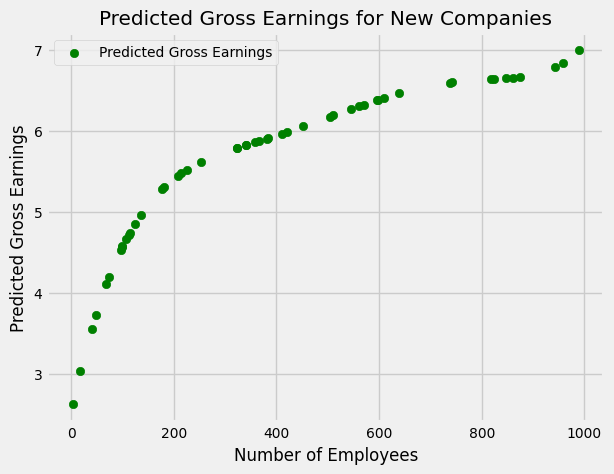

In [20]:
# Visualize the predictions
plt.scatter(new_companies, predictions, color='green', label='Predicted Gross Earnings')
plt.xlabel('Number of Employees')
plt.ylabel('Predicted Gross Earnings')
plt.legend()
plt.title('Predicted Gross Earnings for New Companies')
plt.show()


Finally, it could be intresting to compare the new predicted values with the originals. Let's compare the outputs.

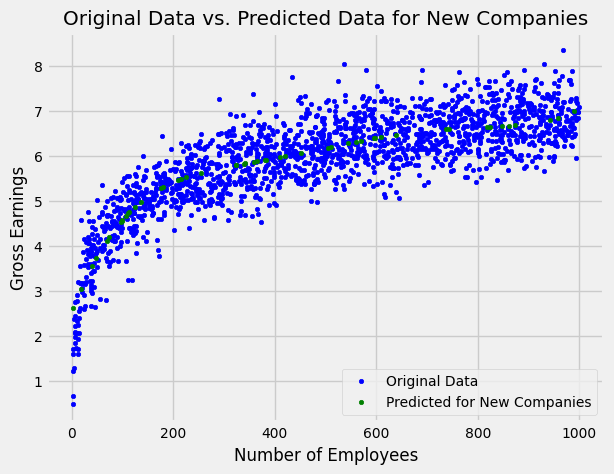

In [21]:
# Plot the original data
plt.scatter(df['Number of Employees'], df['Gross Earnings'], color='blue', label='Original Data', s=10)

# Plot the predicted data for new companies
plt.scatter(new_data_predictions['Number of Employees'], new_data_predictions['Predicted Gross Earnings'], color='green', label='Predicted for New Companies', s=10)

# Enhance the plot
plt.title('Original Data vs. Predicted Data for New Companies')
plt.xlabel('Number of Employees')
plt.ylabel('Gross Earnings')
plt.legend()
plt.show()

## 8.ML Ops

This step focuses on bridging the gap between the development of machine learning models and their deployment and maintenance in production environments.

The purpose of this stage is to streamline and automate the machine learning lifecycle, from data preparation and model training to deployment, monitoring, and management. This ensures that ML models are scalable, reliable, and maintainable, allowing organizations to efficiently leverage their machine earning capabilities.

#### What Could Be Done in ML Ops

1. **Continuous Integration and Continuous Deployment (CI/CD)**: Automate the testing, integration, delivery, and deployment of ML models using CI/CD pipelines to reduce manual errors and speed up the deployment process.

2. **Model Serving**: Choose an appropriate model serving architecture (e.g., online, batch, or streaming) based on the application's requirements.

3. **Monitoring and Logging**: Implement monitoring for model performance, data drift, and operational metrics. Logging is crucial for debugging and understanding model behavior in production.

4. **Version Control**: Use version control for models, data, and code to track changes, facilitate rollbacks, and manage dependencies.

5. **Scalability and Reliability**: Ensure the infrastructure can handle varying loads and recover from failures, using cloud services, containers (e.g., Docker), and orchestration tools (e.g., Kubernetes).

6. **Security and Compliance**: Apply security best practices and comply with data protection regulations (e.g., GDPR, HIPAA).

7. **Model Retraining and Updating**: Set up processes for periodic retraining of models with new data and smooth rollout of updated models.

8. **KPI for screening the process**: somes KPI to crontrol and verify importants metrics in the ML cycle.

#### Deployment on AWS, Azure, and GCP

Deploying a machine learning model involves making the model accessible as a service (e.g., via an API) so that applications and users can make predictions. Here's an essential guide for deploying on AWS, Azure, and GCP:

**AWS SageMaker**
SageMaker provides a complete platform to build, train, and deploy machine learning models. It supports direct deployment from model artifacts.
Use SageMaker Studio or the AWS CLI to create a model, specify the Docker container (for custom models), and configure the instance type.
Deploy the model as an endpoint and use AWS API Gateway and AWS Lambda for additional integrations if necessary.

**Azure Machine Learning Studio**

Azure ML Studio offers an integrated, end-to-end data science and advanced analytics solution.
Use Azure ML to create a workspace, register your model, create a scoring script, and define an environment (dependencies).
Deploy the model as a web service on Azure Container Instances (ACI) for testing or Azure Kubernetes Service (AKS) for production.

**Google Cloud AI Platform**

AI Platform supports model training, versioning, and deployment.
Upload your trained model to Google Cloud Storage, create a model and a version in AI Platform, specifying the runtime version and machine type.
Deploy the model to AI Platform Predictions for access as a REST API.

#### Python Application for Deployment 

A Python application for deployment might include scripts for automating the deployment process, such as creating model artifacts, defining environments, and interacting with cloud service APIs. Here's a pseudocode outline:

In [22]:
# This is a simplified pseudocode to illustrate the deployment process
import boto3  # For AWS
from azureml.core import Workspace  # For Azure
from google.cloud import aiplatform  # For GCP

# AWS Deployment
def deploy_to_sagemaker(model_path, instance_type):
    sagemaker_client = boto3.client('sagemaker')
    # Steps to create a model, endpoint configuration, and deploy an endpoint

# Azure Deployment
def deploy_to_azure(workspace_name, model_path, env_file):
    ws = Workspace.get(name=workspace_name)
    # Steps to register model, create scoring script, define environment, and deploy

# GCP Deployment
def deploy_to_gcp(project_id, model_path, region):
    aiplatform.init(project=project_id, location=region)
    # Steps to upload model to GCS, create model and version in AI Platform, and deploy

# Example usage
# deploy_to_sagemaker('path/to/model', 'ml.m5.large')
# deploy_to_azure('my_workspace', 'path/to/model', 'env.yml')
# deploy_to_gcp('my_project', 'path/to/model', 'us-central1')


ModuleNotFoundError: No module named 'boto3'

The actual deployment involves detailed steps specific to each platform and the particularities of the model and application architecture. Security credentials, resource management, and cost considerations are crucial at this stage. It's recommended to refer to each cloud provider's documentation for detailed instructions and best practices.

## Session information

In [ ]:
import session_info
session_info.show(html=False)

-----
joblib              1.3.2
matplotlib          3.8.3
numpy               1.26.1
pandas              2.1.1
session_info        1.0.0
sklearn             1.4.1.post1
-----
IPython             8.16.1
jupyter_client      8.5.0
jupyter_core        5.4.0
-----
Python 3.11.6 (v3.11.6:8b6ee5ba3b, Oct  2 2023, 11:18:21) [Clang 13.0.0 (clang-1300.0.29.30)]
macOS-13.5.2-x86_64-i386-64bit
-----
Session information updated at 2024-02-26 09:29
